In [1]:
import sys

In [2]:
sys.path.append('/home/ubuntu/miniconda3/envs/raspberrypi/lib/python3.6')
sys.path.append('/home/ubuntu/miniconda3/envs/raspberrypi/lib/python3.6/lib-dynload')
sys.path.append('/home/ubuntu/miniconda3/envs/raspberrypi/lib/python3.6/site-packages')
sys.path.append('/home/ubuntu/miniconda3/envs/raspberrypi/lib/python36.zip')

In [3]:
sys.path

['',
 '/opt/ros/dashing/lib/python3.6/site-packages',
 '/home/ubuntu/miniconda3/envs/raspberrypi/lib/python36.zip',
 '/home/ubuntu/miniconda3/envs/raspberrypi/lib/python3.6',
 '/home/ubuntu/miniconda3/envs/raspberrypi/lib/python3.6/lib-dynload',
 '/home/ubuntu/miniconda3/envs/raspberrypi/lib/python3.6/site-packages',
 '/home/ubuntu/miniconda3/envs/raspberrypi/lib/python3.6/site-packages/IPython/extensions',
 '/home/ubuntu/.ipython',
 '/home/ubuntu/miniconda3/envs/raspberrypi/lib/python3.6',
 '/home/ubuntu/miniconda3/envs/raspberrypi/lib/python3.6/lib-dynload',
 '/home/ubuntu/miniconda3/envs/raspberrypi/lib/python3.6/site-packages',
 '/home/ubuntu/miniconda3/envs/raspberrypi/lib/python36.zip']

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import cv2
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.
/home/ubuntu/miniconda3/envs/raspberrypi/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/miniconda3/envs/raspberrypi/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/miniconda3/envs/raspberrypi/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/h

In [5]:
!pwd

/home/ubuntu/raspberry-pi


In [6]:
import numpy as np

In [7]:
img_width, img_height = 120, 59

In [8]:
train_data_dir = '/home/ubuntu/raspberry-pi/autocars/data/dataset_f_l_r_3c/train'
validation_data_dir = '/home/ubuntu/raspberry-pi/autocars/data/dataset_f_l_r_3c/valid'
predict_data_dir = '/home/ubuntu/raspberry-pi/autocars/data/raw'
nb_train_samples = 2000
nb_validation_samples = 100
epochs = 15
batch_size = 10

In [9]:
input_shape = (img_height, img_width, 1)

In [10]:
model = Sequential()
model.add(Conv2D(8, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 57, 118, 8)        80        
_________________________________________________________________
activation_1 (Activation)    (None, 57, 118, 8)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 59, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 57, 16)        1168      
_________________________________________________________________
activation_2 (Activation)    (None, 26, 57, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 28, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 26, 32)       

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])

In [13]:
def lane_detect(image):
    image = np.asarray(image)
    image = image.astype(float) * 255
    image = image.astype(np.uint8)
    image = cv2.GaussianBlur(image,(5,5),0)
    edges = cv2.Canny(image,50,150)
    height, width = image.shape[:2]
    valid_height = 20
    triangle = np.array([[(0, valid_height), (0, height), (width, height), (width, valid_height)]])
    mask = np.zeros_like(image)
    mask = cv2.fillPoly(mask, triangle, 255)
    mask = cv2.bitwise_and(image, mask)
    mask = mask.astype(float) / 255.0
    mask = mask.reshape(height, width, 1)
    return mask
    

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False
)
#    preprocessing_function=lane_detect)

In [15]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255,
    horizontal_flip=False
)
#    preprocessing_function=lane_detect)

In [16]:
train_data_dir

'/home/ubuntu/raspberry-pi/autocars/data/dataset_f_l_r_3c/train'

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical')

Found 346 images belonging to 3 classes.


In [18]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical')

Found 16 images belonging to 3 classes.


In [19]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/15
200/200 [==============================] - 3s 15ms/step - loss: 0.9105 - categorical_accuracy: 0.5962 - val_loss: 0.9311 - val_categorical_accuracy: 0.6875
Epoch 2/15
200/200 [==============================] - 3s 13ms/step - loss: 0.5599 - categorical_accuracy: 0.7815 - val_loss: 0.9381 - val_categorical_accuracy: 0.6875
Epoch 3/15
200/200 [==============================] - 3s 13ms/step - loss: 0.4116 - categorical_accuracy: 0.8383 - val_loss: 1.2692 - val_categorical_accuracy: 0.6250
Epoch 4/15
200/200 [==============================] - 3s 13ms/step - loss: 0.3697 - categorical_accuracy: 0.8617 - val_loss: 1.2609 - val_categorical_accuracy: 0.6250
Epoch 5/15
200/200 [==============================] - 3s 13ms/step - loss: 0.3284 - categorical_accuracy: 0.8812 - val_loss: 1.6985 - val_categorical_accuracy: 0.6250
Epoch 6/15
200/200 [==============================] - 3s 13ms/step - lo

In [20]:
model.save_weights('self_driver_car_231201.h5')

In [21]:
predict_generator = test_datagen.flow_from_directory(
    predict_data_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle = False
)

Found 627 images belonging to 1 classes.


In [22]:
print(train_generator.class_indices)
output = {v:k for k,v in train_generator.class_indices.items()}

filenames = predict_generator.filepaths
nb_samples = len(filenames)

predict = model.predict_generator(predict_generator, nb_samples)


{'forward': 0, 'left': 1, 'right': 2}


In [23]:
predict
#model.evaluate(predict_generator)

array([[7.85899639e-01, 1.94836957e-06, 1.03337236e-07],
       [7.84419060e-01, 5.46486035e-06, 5.90258438e-08],
       [6.13098562e-01, 1.24621991e-04, 2.83078725e-06],
       ...,
       [9.18212481e-06, 5.46084158e-03, 9.95535731e-01],
       [3.91610549e-04, 1.79802850e-01, 7.91652203e-01],
       [4.12248744e-04, 1.86334074e-01, 7.88267136e-01]], dtype=float32)

In [24]:
import ipyplot
import cv2

In [25]:
image_array = []
label_array = []
for f, pred in zip(filenames, predict):
    print(f)
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    #img = lane_detect(img)
    img = img.reshape(img.shape[0], img.shape[1])
    image_array.append(img)
    label_array.append("(%s)" % (output[np.argmax(pred)]))


/home/ubuntu/raspberry-pi/autocars/data/raw/label/1682157752_null.png
/home/ubuntu/raspberry-pi/autocars/data/raw/label/1682157753_forward.png
/home/ubuntu/raspberry-pi/autocars/data/raw/label/1682157753_null.png
/home/ubuntu/raspberry-pi/autocars/data/raw/label/1682157754_forward.png
/home/ubuntu/raspberry-pi/autocars/data/raw/label/1682157754_null.png
/home/ubuntu/raspberry-pi/autocars/data/raw/label/1682157755_forward.png
/home/ubuntu/raspberry-pi/autocars/data/raw/label/1682157755_null.png
/home/ubuntu/raspberry-pi/autocars/data/raw/label/1682157756_forward.png
/home/ubuntu/raspberry-pi/autocars/data/raw/label/1682157756_null.png
/home/ubuntu/raspberry-pi/autocars/data/raw/label/1682157757_left.png
/home/ubuntu/raspberry-pi/autocars/data/raw/label/1682157757_null.png
/home/ubuntu/raspberry-pi/autocars/data/raw/label/1682157758_left.png
/home/ubuntu/raspberry-pi/autocars/data/raw/label/1682157758_null.png
/home/ubuntu/raspberry-pi/autocars/data/raw/label/1682157759_forward.png
/home


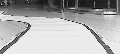
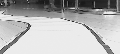
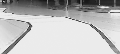
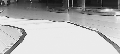
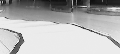
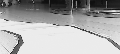
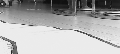
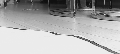
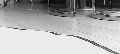
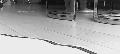
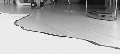
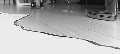
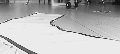
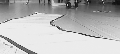
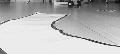
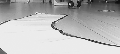
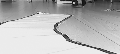
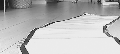
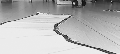
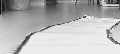
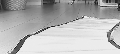
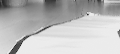
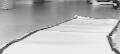
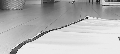
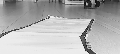
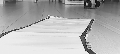
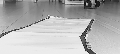
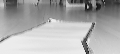
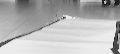
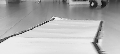
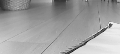
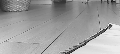
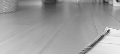
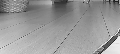
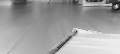
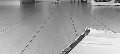
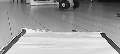
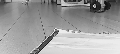
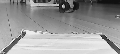
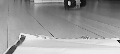
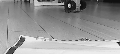
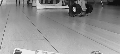
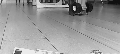
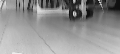
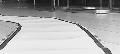
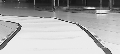
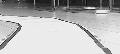
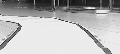
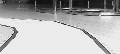
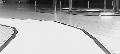
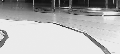
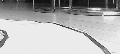
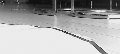
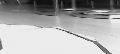
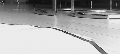
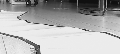
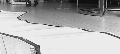
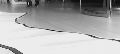
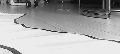
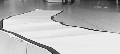
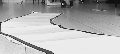
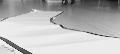
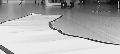
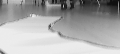
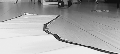
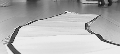
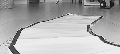
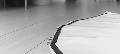
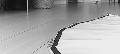
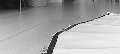
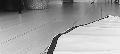
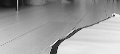
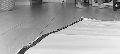
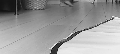
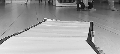
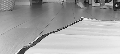
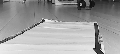
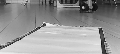
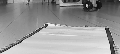
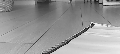
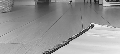
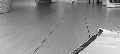
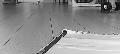
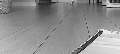
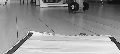
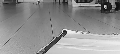
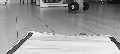
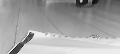
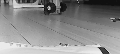
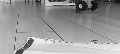
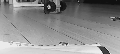
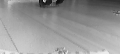
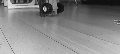
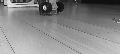
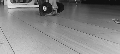
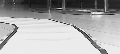
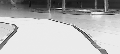
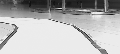
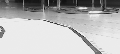
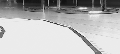
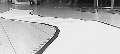
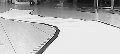
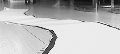
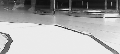
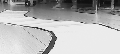
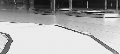
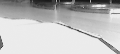
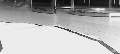
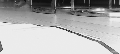
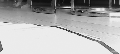
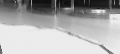
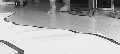
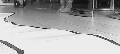
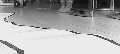
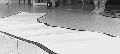
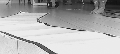
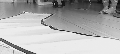
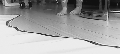
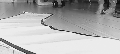
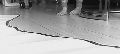
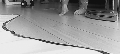
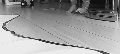
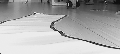
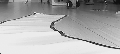
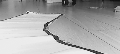
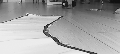
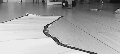
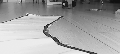
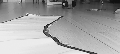
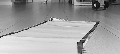
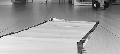
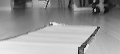
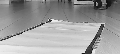
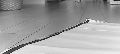
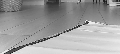
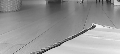
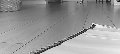
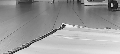
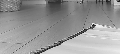
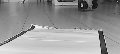
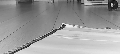
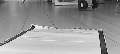
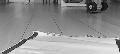
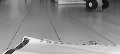
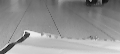
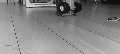
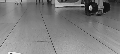
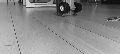
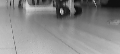
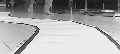
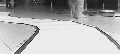
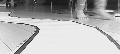
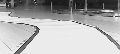
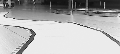
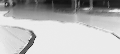
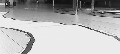
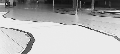
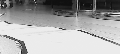
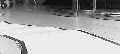
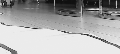
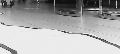
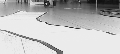
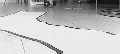
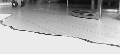
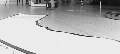
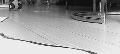
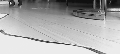
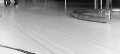
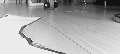
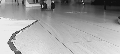
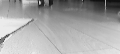
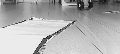
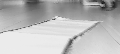
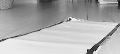
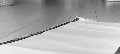
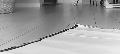
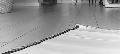
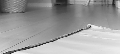
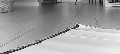
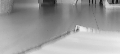
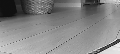
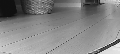
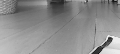
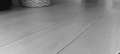
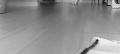
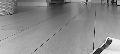
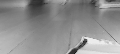
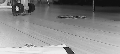
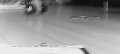
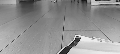
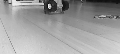
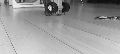
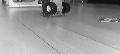
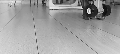
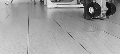
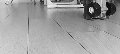
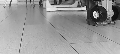
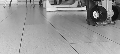
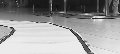
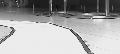
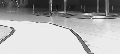
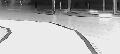
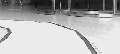
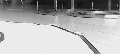
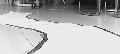
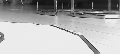
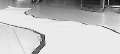
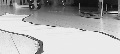
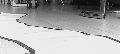
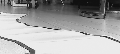
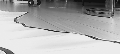
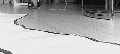
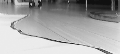
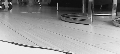
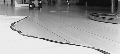
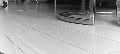
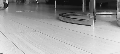
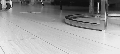
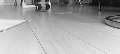
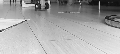
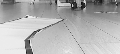
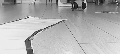
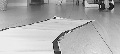
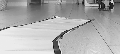
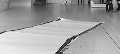
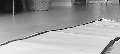
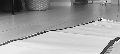
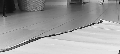
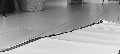
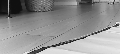
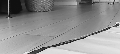
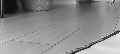
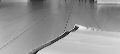
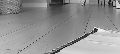
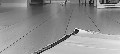
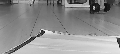
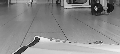
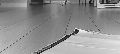
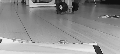
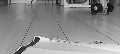
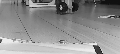
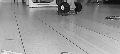
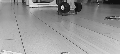
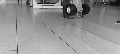
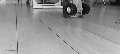
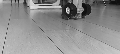
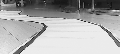
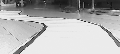
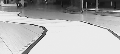
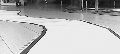
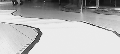
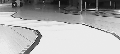
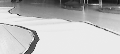
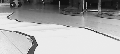
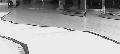
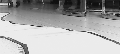
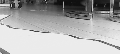
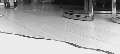
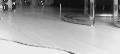
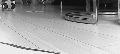
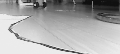
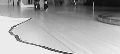
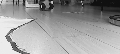
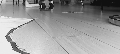
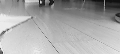
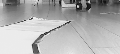
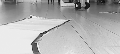
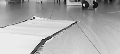
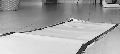
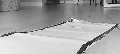
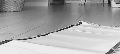
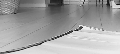
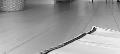
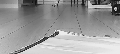
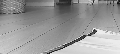
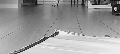
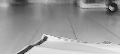
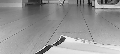
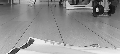
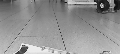
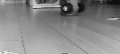
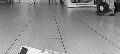
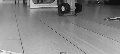
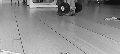
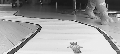
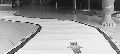
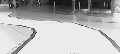
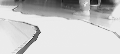
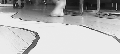
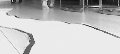
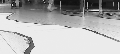
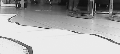
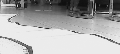
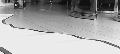
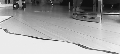
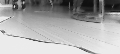
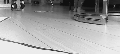
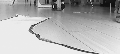
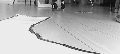
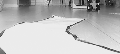
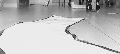
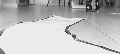
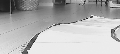
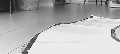
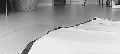
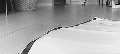
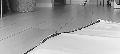
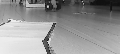
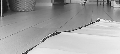
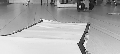
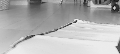
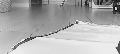
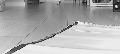
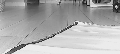
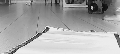
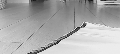
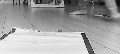
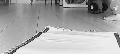
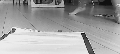
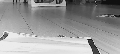
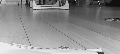
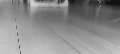
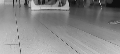
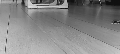
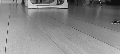
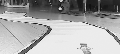
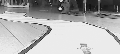
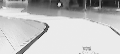
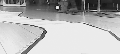
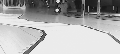
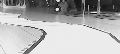
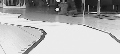
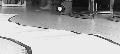
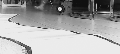
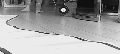
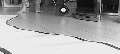
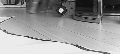
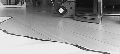
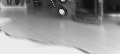
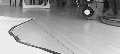
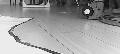
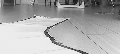
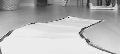
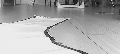
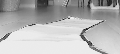
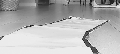
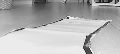
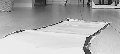
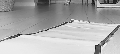
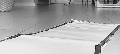
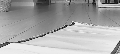
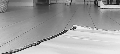
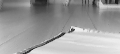
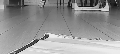
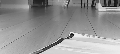
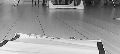
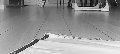
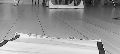
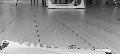
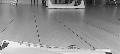
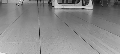
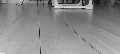
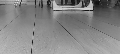
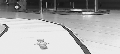
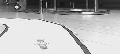
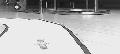
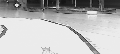
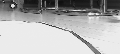
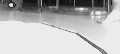
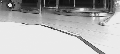
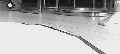
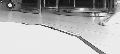
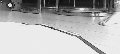
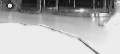
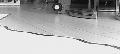
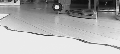
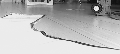
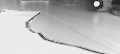
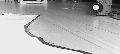
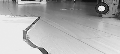
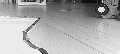
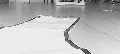
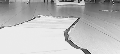
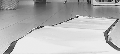
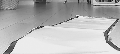
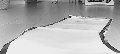
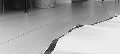
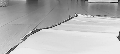
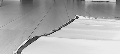
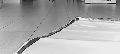
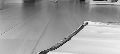
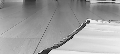
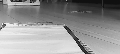
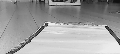
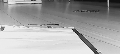
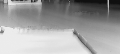
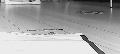
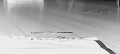
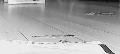
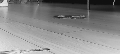
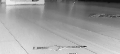
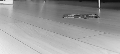
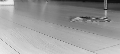
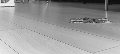
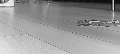
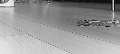
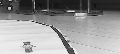
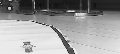
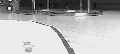
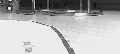
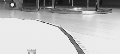
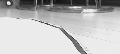
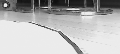
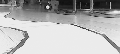
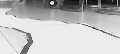
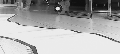
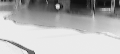
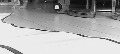
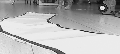
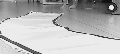
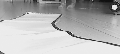
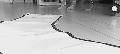
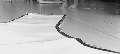
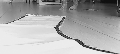
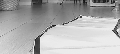
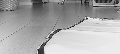
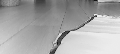
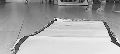
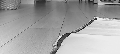
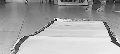
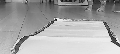
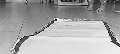
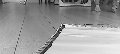
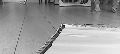
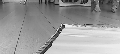
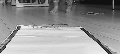
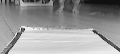
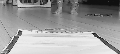
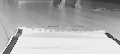
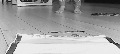
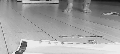
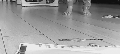
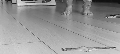
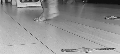
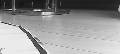
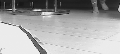
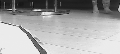
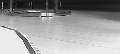
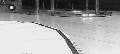
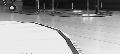
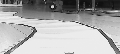
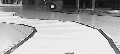
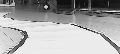
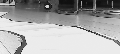
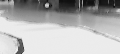
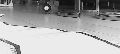
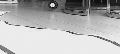
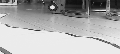
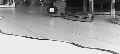
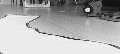
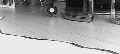
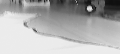
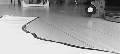
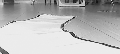
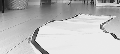
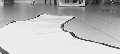
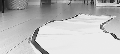
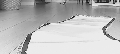
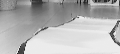
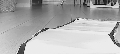
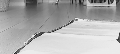
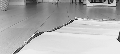
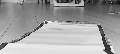
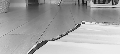
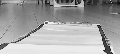
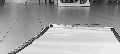
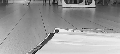
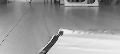
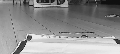
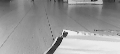
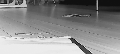
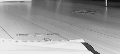
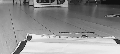
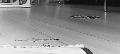
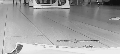
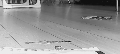
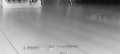
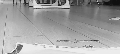
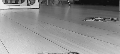
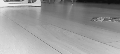
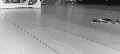
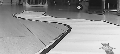
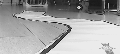
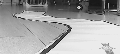
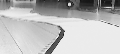
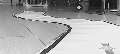
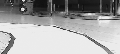
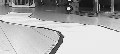
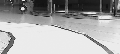
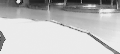
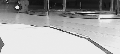
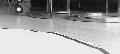
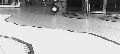
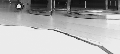
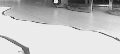
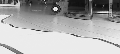
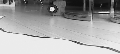
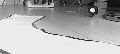
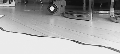
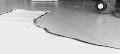
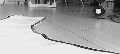
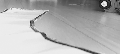
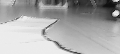
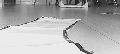
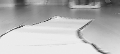
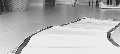
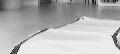
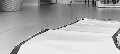
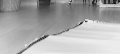
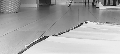
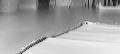
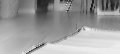
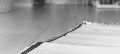
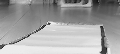
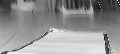
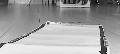
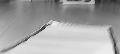
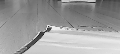
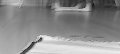
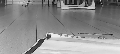
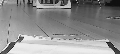
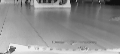
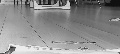
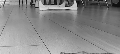
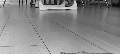
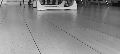
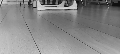
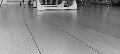
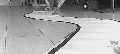
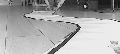
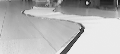
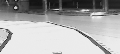
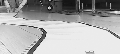
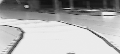
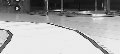
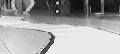
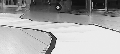
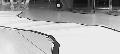
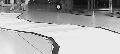
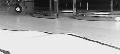
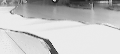
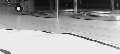
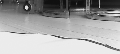
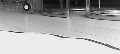
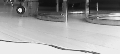
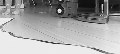
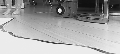
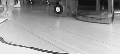
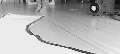
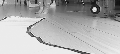
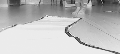
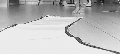
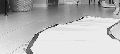
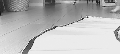
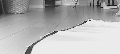
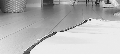
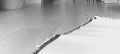
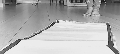
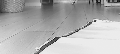
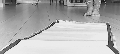
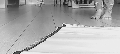
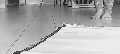
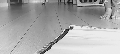
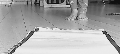
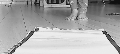
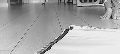
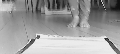
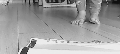
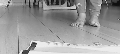
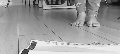
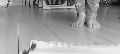
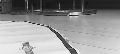
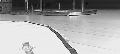
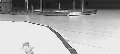
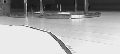
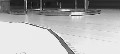
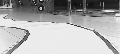
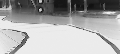
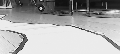
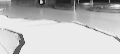
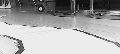
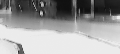
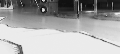
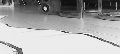
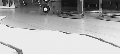
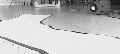
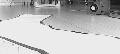
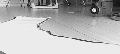
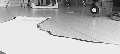
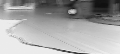
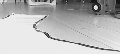
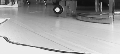
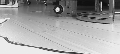
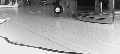
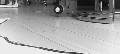
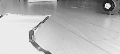
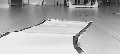
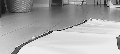
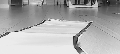
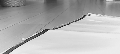
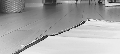
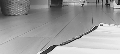
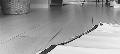
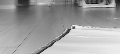
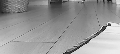
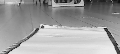
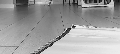
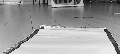
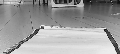
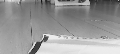
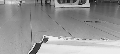
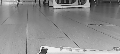
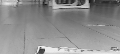
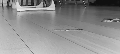
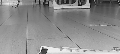
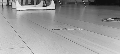
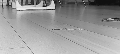


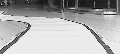
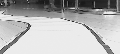
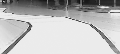
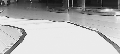
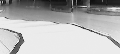
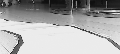
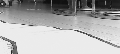
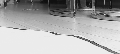
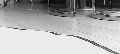
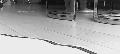
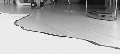
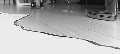
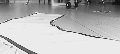
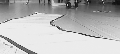
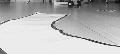
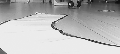
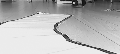
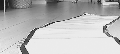
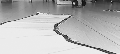
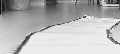
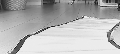
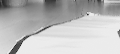
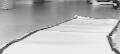
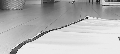
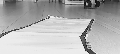
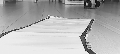
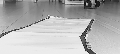
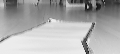
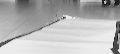
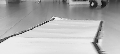
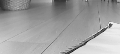
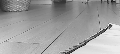
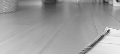
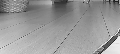
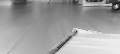
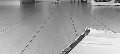
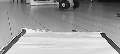
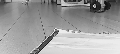
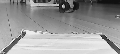
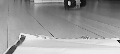
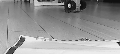
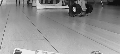
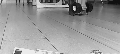
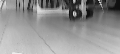
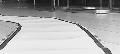
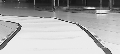
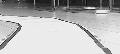
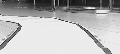
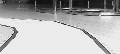
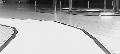
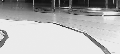
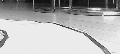
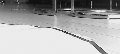
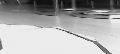
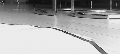
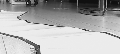
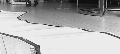
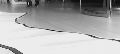
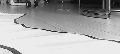
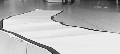
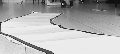
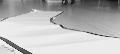
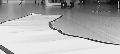
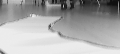
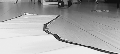
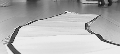
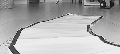
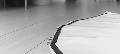
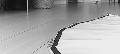
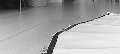
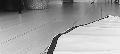
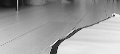
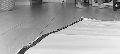
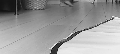
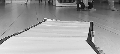
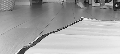
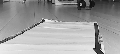
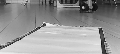
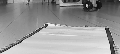
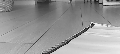
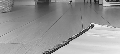
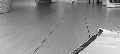
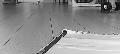
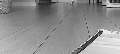
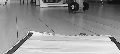
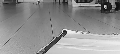
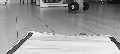
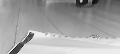
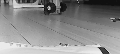
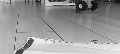
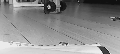
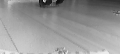
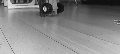
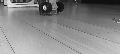
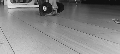
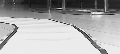
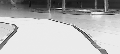
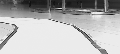
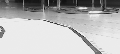
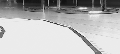
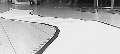
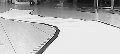
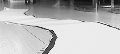
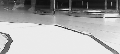
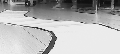
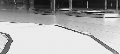
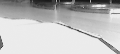
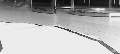
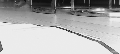
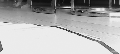
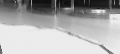
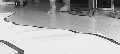
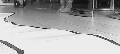
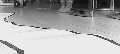
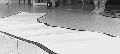
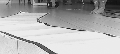
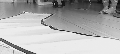
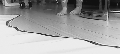
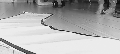
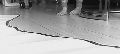
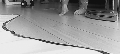
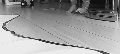
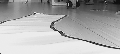
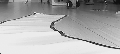
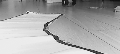
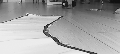
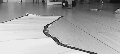
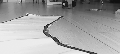
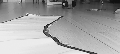
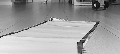
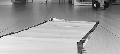
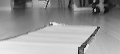
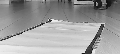
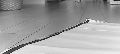
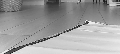
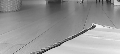
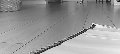
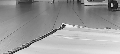
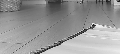
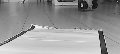
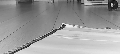
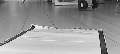
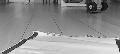
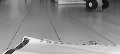
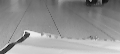
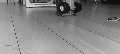
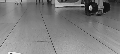
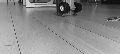
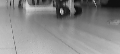
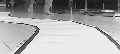
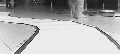
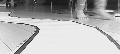
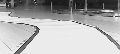
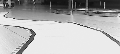
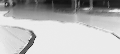
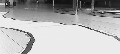
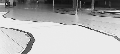
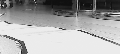
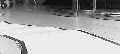
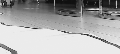
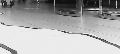
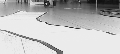
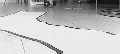
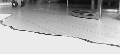
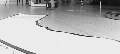
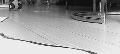
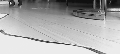
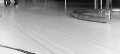
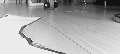
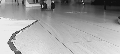
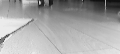
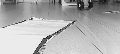
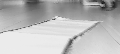
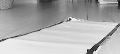
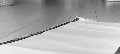
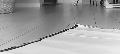
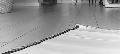
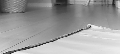
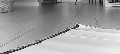
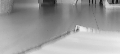
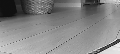
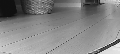
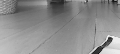
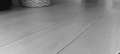
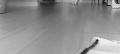
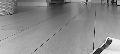
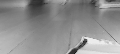
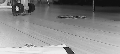
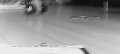
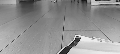
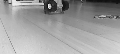
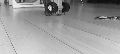
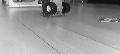
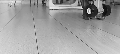
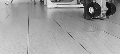
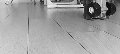
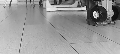
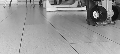
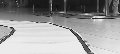
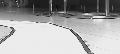
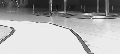
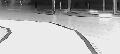
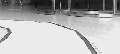
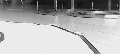
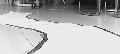
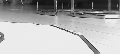
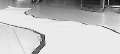
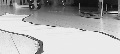
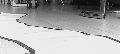
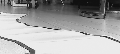
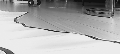
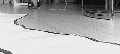
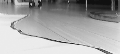
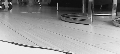
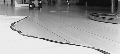
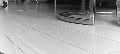
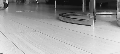
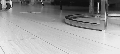
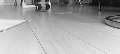
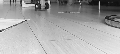
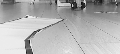
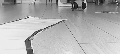
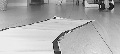
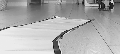
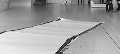
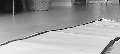
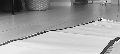
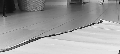
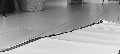
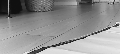
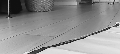
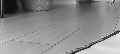
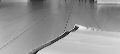
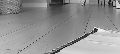
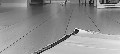
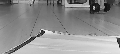
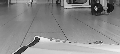
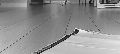
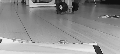
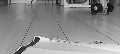
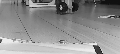
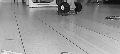
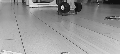
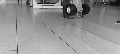
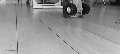
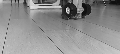
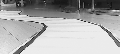
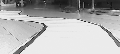
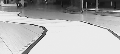
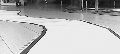
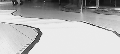
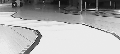
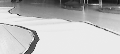
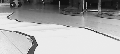
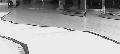
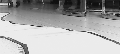
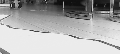
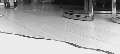
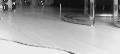
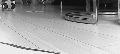
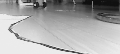
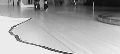
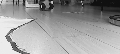
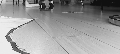
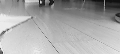
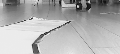
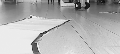
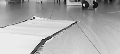
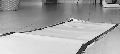
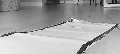
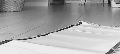
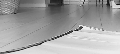
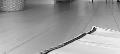
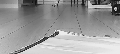
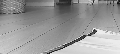
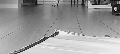
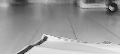
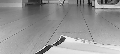
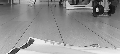
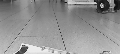
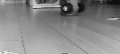
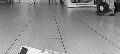
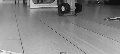
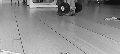
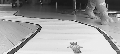
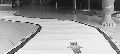
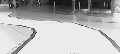
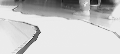
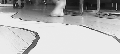
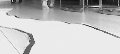
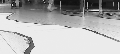
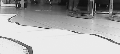
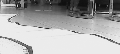
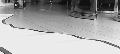
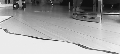
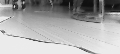
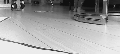
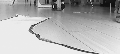
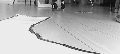
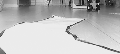
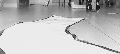
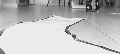
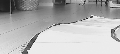
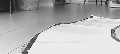
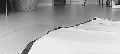
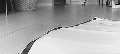
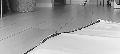
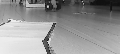
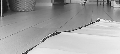
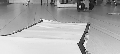
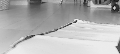
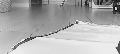
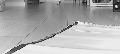
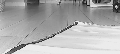
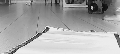
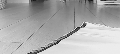
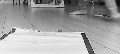
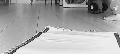
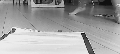
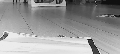
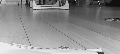
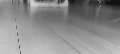
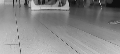
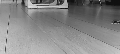
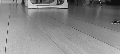
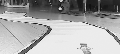
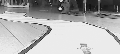
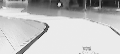
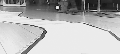
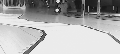
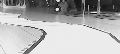
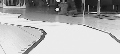
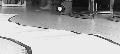
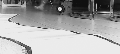
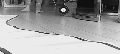
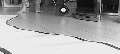
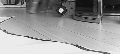
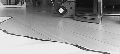
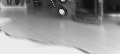
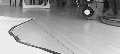
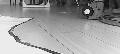
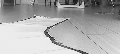
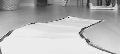
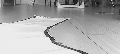
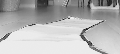
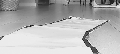
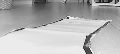
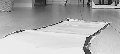
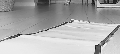
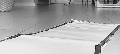
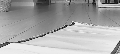
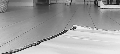
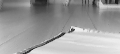
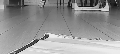
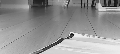
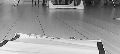
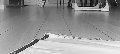
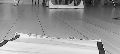
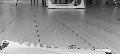
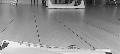
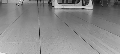
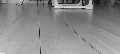
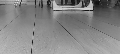
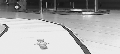
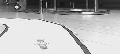
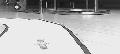
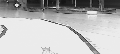
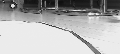
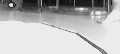
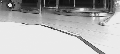
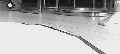
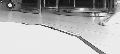
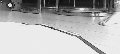
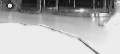
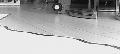
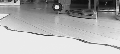
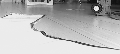
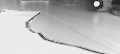
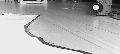
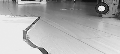
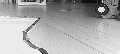
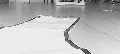
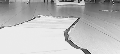
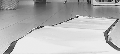
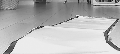
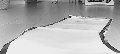
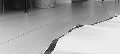
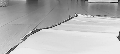
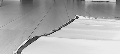
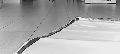
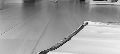
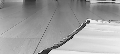
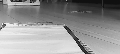
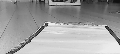
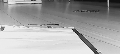
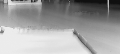
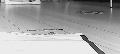
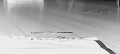
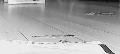
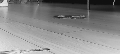
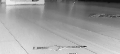
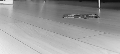
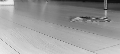
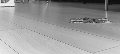
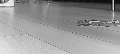
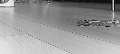
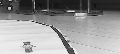
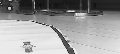
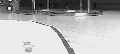
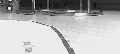
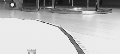
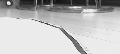
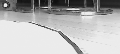
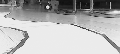
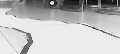
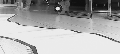
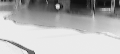
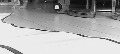
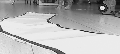
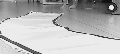
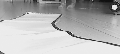
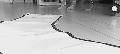
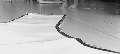
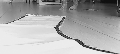
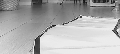
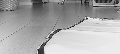
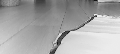
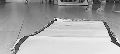
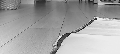
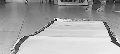
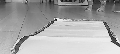
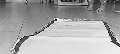
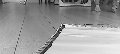
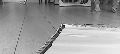
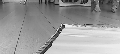
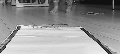
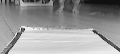
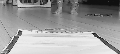
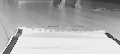
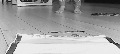
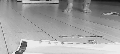
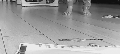
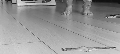
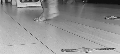
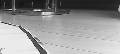
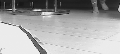
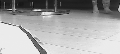
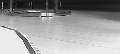
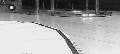
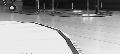
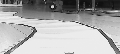
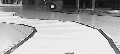
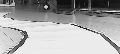
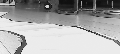
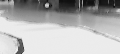
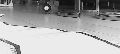
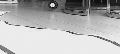
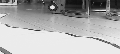
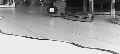
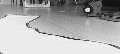
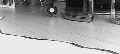
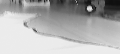
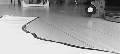
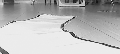
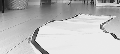
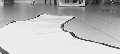
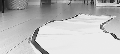
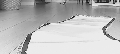
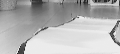
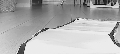
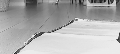
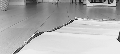
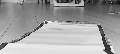
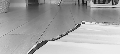
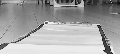
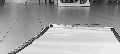
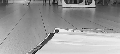
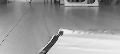
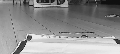
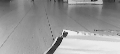
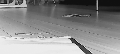
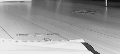
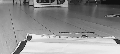
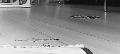
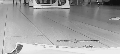
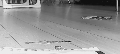
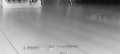
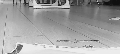
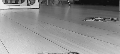
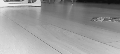
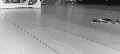
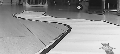
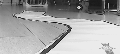
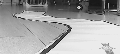
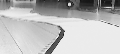
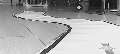
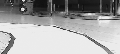
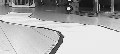
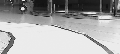
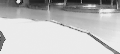
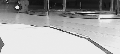
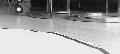
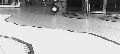
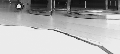
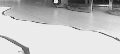
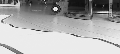
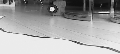
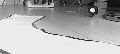
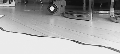
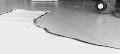
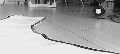
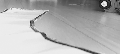
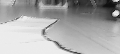
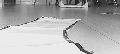
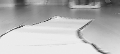
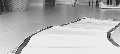
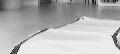
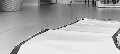
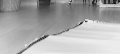
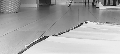
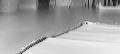
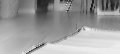
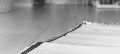
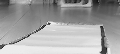
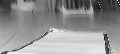
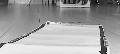
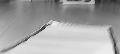
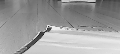
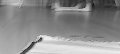
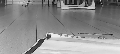
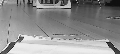
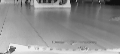
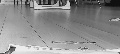
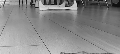
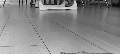
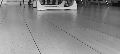
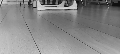
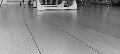
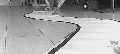
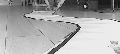
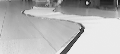
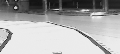
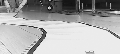
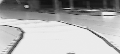
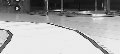
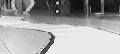
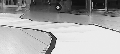
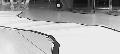
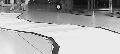
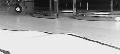
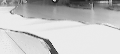
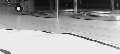
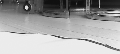
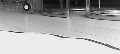
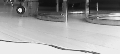
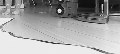
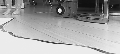
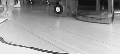
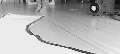
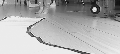
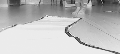
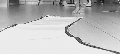
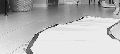
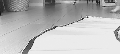
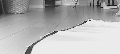
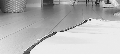
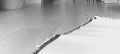
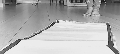
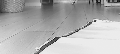
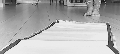
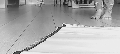
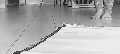
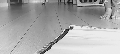
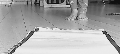
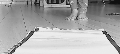
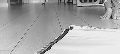
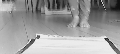
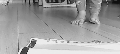
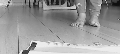
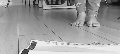
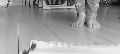
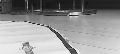
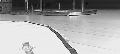
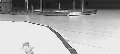
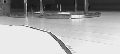
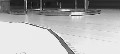
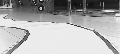
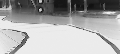
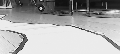
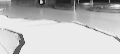
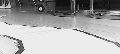
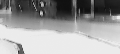
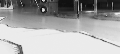
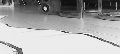
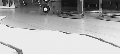
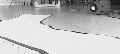
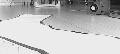
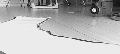
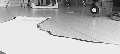
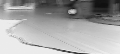
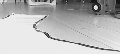
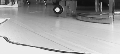
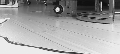
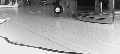
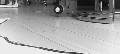
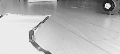
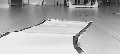
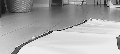
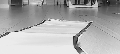
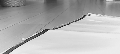
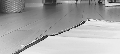
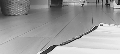
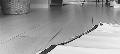
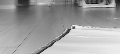
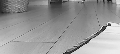
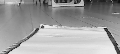
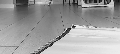
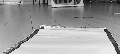
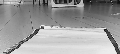
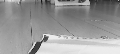
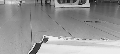
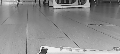
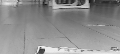
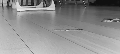
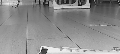
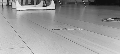
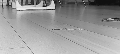

In [26]:
ipyplot.plot_images(image_array, label_array, max_images=2000, img_width=59)